In [3]:
tf.__version__

'2.0.0-alpha0'

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
hello_zarrina = tf.constant("My name is Zarrina")
print('Tensor:', hello_zarrina)
print('Value:', hello_zarrina.numpy())

Tensor: tf.Tensor(b'My name is Zarrina', shape=(), dtype=string)
Value: b'My name is Zarrina'


In [16]:
a = tf.ones([2,2])
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [17]:
# you can't assign a value to a constant, 
# convert it to a variable first
a = tf.Variable(a)

In [18]:
a[0,0].assign(10)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[10.,  1.],
       [ 1.,  1.]], dtype=float32)>

In [ ]:
for function in dir(a):
    print(function)

In [22]:
b = a.read_value()
print(b)

tf.Tensor(
[[10.  1.]
 [ 1.  1.]], shape=(2, 2), dtype=float32)


In [23]:
a.read_value()

<tf.Tensor: id=62, shape=(2, 2), dtype=float32, numpy=
array([[10.,  1.],
       [ 1.,  1.]], dtype=float32)>

In [24]:
d = tf.constant(4)
e = tf.constant(8)

In [31]:
# 3 ways of performing operations
print('a+b:', d.numpy()+e.numpy())
print('Addition with constants:', d+e)
print('Addition with constants:', tf.add(d,e))

a+b: 12
Addition with constants: tf.Tensor(12, shape=(), dtype=int32)
Addition with constants: tf.Tensor(12, shape=(), dtype=int32)


In [32]:
print('a+b:', d.numpy()*e.numpy())
print('Addition with constants:', d*e)
print('Addition with constants:', tf.multiply(d,e))

a+b: 32
Addition with constants: tf.Tensor(32, shape=(), dtype=int32)
Addition with constants: tf.Tensor(32, shape=(), dtype=int32)


In [51]:
# convert a value to a tensor using `convert_to_tensor` method
f = tf.convert_to_tensor(2.1)

# cast it to an integer
g = tf.cast(f, tf.int32)
print(f, g)

tf.Tensor(2.1, shape=(), dtype=float32) tf.Tensor(2, shape=(), dtype=int32)


In [37]:
h = tf.ones([2,3])
print(h.shape[0], h.shape[1], h.shape)

2 3 (2, 3)


In [38]:
shape = tf.shape(h) #saves into shape tensor
print(shape[0], shape[1])

tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)


In [40]:
var = tf.Variable(2)
var.assign_add(1)
print('Value:', var.numpy())

Value: 3


In [41]:
var

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [43]:
var_2 = var+1
var_2.numpy()

4

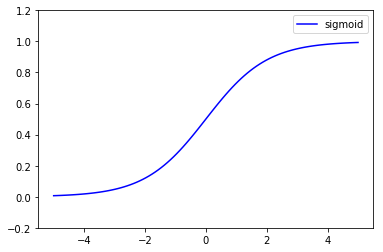

In [44]:
# printing out activation function
x = np.linspace(-5,5,100)
y_sigmoid = tf.nn.sigmoid(x)
plt.plot(x, y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')
plt.show()

In [66]:
n = tf.Variable(4.0)
print(n.numpy())

4.0


In [67]:
def f(x):
    return n*x
print(f(3))

tf.Tensor(12.0, shape=(), dtype=float32)


In [68]:
loss = lambda: abs(f(5) - 5)
print(loss)

<function <lambda> at 0xb28f93400>


In [72]:
optimizer = tf.optimizers.Adam(learning_rate=1)
for _ in range(10):
    optimizer.minimize(loss, var_list=[n])
    print(n.numpy(), f(5))


0.5544478 tf.Tensor(2.7722392, shape=(), dtype=float32)
0.6070792 tf.Tensor(3.035396, shape=(), dtype=float32)
1.0092943 tf.Tensor(5.0464716, shape=(), dtype=float32)
1.0037694 tf.Tensor(5.018847, shape=(), dtype=float32)
0.75540006 tf.Tensor(3.7770004, shape=(), dtype=float32)
0.7734576 tf.Tensor(3.8672879, shape=(), dtype=float32)
0.97973347 tf.Tensor(4.8986673, shape=(), dtype=float32)
1.3253733 tf.Tensor(6.6268663, shape=(), dtype=float32)
1.4513454 tf.Tensor(7.256727, shape=(), dtype=float32)
1.4044428 tf.Tensor(7.022214, shape=(), dtype=float32)


## Mnist Image Classification

In [73]:
# https://www.tensorflow.org/overview
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


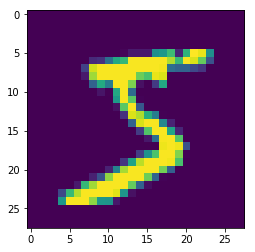

In [74]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

In [75]:
x_train = x_train / 255.0 
x_test = x_test / 255.0

In [78]:
# Train image classification model using TensorFlow2 Keras API

# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Model
class MyModel(tf.keras.Model):
    # Initialize layers as a constructor properties
    def __init__(self):
        
        super().__init__()
        self.flat = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
        #set up loss function
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/losses/SparseCategoricalCrossentropy
        self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
        
        # 
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/metrics/Accuracy
        self.accuracy = tf.keras.metrics.Accuracy()
        # https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/optimizers/Adam
        self.optimizer = tf.optimizers.Adam()
        
    # take inputs and run them through each layer
    def call(self, inputs):
        flat = self.flat(inputs)
        dense1 = self.dense1(flat)
        return self.dense2(dense1)
    
    # Calculate the loss 
    def get_loss(self, inputs, expected):
        return self.loss(expected, self(inputs))
    
    # Calculate the accuracy
    def get_accuracy(self, inputs, expected):
        return self.accuracy(expected, tf.argmax(self(inputs), axis=1))
    
    # optimizer to minimize the loss
    def optimize(self, inputs, expected):
        # calculate the loss
        loss = lambda: self.get_loss(inputs, expected)
        
        self.optimizer.minimize(loss=loss, var_list=self.trainable_weights)
        
    # train the model
    def fit(self, x, y, batch_size, epochs):
        num_samples = x.shape[0]
        for ep in range(epochs):
            for i_start in range(0, num_samples, batch_size):
                x_batch = x[i_start : i_start+batch_size]
                y_batch = y[i_start : i_start+batch_size]
                self.optimize(x_batch, y_batch)
            loss = self.get_loss(x,y)
            acc = self.get_accuracy(x,y)
            print(f'Epoch: {ep}, loss: {loss}, accuracy: {acc}')

In [79]:
# Initialize the model and call the training function
my_model = MyModel()
my_model.fit(x_train, y_train, batch_size=50, epochs=5)

Epoch: 0, loss: 0.15736503899097443, accuracy: 0.9535333514213562
Epoch: 1, loss: 0.10244810581207275, accuracy: 0.9611499905586243
Epoch: 2, loss: 0.08854284137487411, accuracy: 0.964638888835907
Epoch: 3, loss: 0.07458619028329849, accuracy: 0.9674208164215088
Epoch: 4, loss: 0.05725006014108658, accuracy: 0.9702200293540955


In [80]:
np.argmax(my_model(x_train[:1]))


5